<strong>The data I will be using is from Chicago police department and it contains all crimes reported during 2001 and 2016. The purpose of this <br>
analysis is  to find out where and when crimes occur. What are the factors that affect the number of crimes and location of crimes? During the data <br>
exploring process, there are some interesting trends/correlations that draw my attention. Some statistical tests will be performed to test significance.

In [1]:
# First import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gmaps                                # Used for plotting data on google maps using an API
from matplotlib import cm          # To get certain color maps for plotting
import ipywidgets as widgets    # Display widgets to help visualization
import json
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn')
pd.set_option('display.width', 500)
pd.set_option('max_columns', 60)

In [2]:
# First read in the crime file
crimes=pd.read_csv('data/crime/crimes_chi.csv')

The data has been cleaned and wrangled to be used for the analysis. It is very large so here is an external link to the file: <br>
<a href="https://www.dropbox.com/s/ivtt51dltfl8x6t/Crimes_chi.csv?dl=0">Crime data download</a> <br>
This data set has all the entries for 8 major felonies and it's used for our analysis to find interesting trends or patterns.

In [3]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647369,HM155213,01/31/2006 12:13:05 PM,066XX N BOSWORTH AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,"SCHOOL, PUBLIC, BUILDING",True,False,2432,24.0,40.0,1.0,18,1164737.0,1944193.0,2006,04/15/2016 08:55:02 AM,42.002478,-87.669297,"(42.002478396, -87.66929687)"
1,4647370,HM245080,03/21/2006 07:00:00 PM,062XX S WESTERN AVE,1330,CRIMINAL TRESPASS,TO LAND,PARKING LOT/GARAGE(NON.RESID.),True,False,825,8.0,15.0,66.0,26,1161441.0,1863309.0,2006,04/15/2016 08:55:02 AM,41.780595,-87.683676,"(41.780595495, -87.68367553)"
2,4647372,HM171175,02/09/2006 01:44:41 AM,058XX S SHIELDS AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,711,7.0,20.0,68.0,18,1174958.0,1866097.0,2006,04/15/2016 08:55:02 AM,41.787955,-87.634037,"(41.787955143, -87.634036744)"
3,4647373,HM244805,03/21/2006 04:45:00 PM,011XX N SPAULDING AVE,0810,THEFT,OVER $500,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1121,11.0,26.0,23.0,06,1154100.0,1907414.0,2006,04/15/2016 08:55:02 AM,41.901774,-87.709415,"(41.901774026, -87.709414574)"
4,4647374,HM245851,03/21/2006 10:00:00 PM,080XX S DOBSON AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,631,6.0,8.0,44.0,06,1184622.0,1851863.0,2006,04/15/2016 08:55:02 AM,41.748675,-87.599049,"(41.748674558, -87.599048654)"


<strong>When I was doing my EDA on this data set, I found some interesting correlations and trends. This prompted me to do some statistical <br>
analysis and try to find factors that contribute to different crimes. </strong>

In [4]:
# First see the trend of all crimes. Convert Date column to date time and set as index
crimes['Date']=pd.to_datetime(crimes['Date'], format='%m/%d/%Y %H:%M:%S %p')

In [5]:
crimes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6478356 entries, 0 to 6478355
Data columns (total 22 columns):
ID                      6478356 non-null int64
Case Number             6478352 non-null object
Date                    6478356 non-null datetime64[ns]
Block                   6478356 non-null object
IUCR                    6478356 non-null object
Primary Type            6478356 non-null object
Description             6478356 non-null object
Location Description    6475409 non-null object
Arrest                  6478356 non-null bool
Domestic                6478356 non-null bool
Beat                    6478356 non-null int64
District                6478307 non-null float64
Ward                    5863502 non-null float64
Community Area          5862326 non-null float64
FBI Code                6478356 non-null object
X Coordinate            6391699 non-null float64
Y Coordinate            6391699 non-null float64
Year                    6478356 non-null int64
Updated On       

In [6]:
crimes.index=crimes['Date']

In [7]:
crimes.index

DatetimeIndex(['2006-01-31 12:13:05', '2006-03-21 07:00:00', '2006-02-09 01:44:41', '2006-03-21 04:45:00', '2006-03-21 10:00:00', '2006-03-20 11:00:00', '2006-02-01 11:25:00', '2006-03-21 02:37:00', '2006-02-09 05:38:07', '2005-11-29 03:10:00',
               ...
               '2017-10-27 06:10:00', '2016-03-17 12:00:00', '2014-08-26 09:00:00', '2017-11-04 12:00:00', '2012-06-01 12:00:00', '2017-11-10 08:24:00', '2017-11-08 09:00:00', '2017-10-15 07:00:00', '2017-11-12 02:07:00', '2017-11-12 02:07:00'],
              dtype='datetime64[ns]', name='Date', length=6478356, freq=None)

In [8]:
#Now drop 2017 data as it's not complete
crimes.sort_index(inplace=True)
crimes=crimes.loc['2001':'2016', :]
crimes.tail(10)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,,
2016-12-31 12:34:00,10800818,HZ571540,2016-12-31 12:34:00,052XX S NASHVILLE AVE,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,811,8.0,23.0,56.0,06,1133268.0,1869091.0,2016,01/07/2017 03:56:13 PM,41.797000,-87.786830,"(41.797000027, -87.786830066)"
2016-12-31 12:35:00,10800715,HZ571278,2016-12-31 12:35:00,064XX S ARTESIAN AVE,0558,ASSAULT,AGG PRO.EMP: OTHER DANG WEAPON,ALLEY,False,False,825,8.0,15.0,66.0,04A,1161150.0,1861795.0,2016,01/07/2017 03:56:13 PM,41.776447,-87.684784,"(41.776446898, -87.684784256)"
2016-12-31 12:37:00,10802521,JA101731,2016-12-31 12:37:00,0000X W DIVISION ST,0460,BATTERY,SIMPLE,BAR OR TAVERN,False,False,1824,18.0,42.0,8.0,08B,1175950.0,1908370.0,2016,01/07/2017 03:56:13 PM,41.903933,-87.629129,"(41.903933222, -87.629128536)"
2016-12-31 12:37:00,10800472,HZ570863,2016-12-31 12:37:00,024XX E 73RD ST,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,STREET,True,False,334,3.0,7.0,43.0,08B,1193973.0,1857035.0,2016,02/22/2017 03:51:20 PM,41.762643,-87.564614,"(41.762642839, -87.564614475)"
2016-12-31 12:40:00,10800801,HZ571317,2016-12-31 12:40:00,032XX W LAWRENCE AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1713,17.0,39.0,14.0,26,1153754.0,1931705.0,2016,01/07/2017 03:56:13 PM,41.968437,-87.710037,"(41.968437296, -87.710036792)"
2016-12-31 12:40:00,10800670,HZ571273,2016-12-31 12:40:00,067XX S OGLESBY AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,331,3.0,5.0,43.0,06,1192930.0,1860661.0,2016,01/07/2017 03:56:13 PM,41.772618,-87.568319,"(41.772618367, -87.568318955)"
2016-12-31 12:45:00,10800655,HZ571281,2016-12-31 12:45:00,002XX S WABASH AVE,0810,THEFT,OVER $500,CTA TRAIN,False,False,113,1.0,42.0,32.0,06,1176845.0,1899365.0,2016,01/07/2017 03:56:13 PM,41.879203,-87.626114,"(41.879202837, -87.626113652)"
2016-12-31 12:45:00,10800795,HZ571287,2016-12-31 12:45:00,090XX S COTTAGE GROVE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,633,6.0,8.0,44.0,08B,1183140.0,1845353.0,2016,01/07/2017 03:56:13 PM,41.730845,-87.604681,"(41.730844975, -87.604681156)"
2016-12-31 12:50:00,10800776,HZ571267,2016-12-31 12:50:00,056XX W CORCORAN PL,041A,BATTERY,AGGRAVATED: HANDGUN,CONVENIENCE STORE,False,False,1512,15.0,29.0,25.0,04B,1138861.0,1902003.0,2016,01/07/2017 03:56:13 PM,41.887216,-87.765522,"(41.887216061, -87.765521526)"


In [9]:
# Plot different crimes from 2001 to 2016 as a time series
# First construct a data frame containing different crime counts by year
by_year=crimes.groupby('Year')['Primary Type'].value_counts()

In [10]:
by_year.head()

Year  Primary Type   
2001  THEFT              99264
      BATTERY            93447
      CRIMINAL DAMAGE    55851
      NARCOTICS          50567
      ASSAULT            31384
Name: Primary Type, dtype: int64

In [11]:
by_year=by_year.unstack(level=1, fill_value=0)
by_year.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001,1010,31384,93447,26011,0,1797,55851,13240,14898,1,934,667,0,406,279,933,1637,27549,50567,0,0,0,19,2237,6,29657,6026,9,2750,8,18441,2230,203,99264,4274
2002,1032,31521,94152,25623,0,1829,55940,13880,13712,0,971,657,0,361,337,829,1414,25121,51789,0,0,0,26,2574,5,32599,6408,8,2457,2,18522,2167,200,98327,4281
2003,955,29477,88377,25156,0,1589,55011,14807,13447,0,1088,604,0,408,364,705,1311,22748,54288,0,1,0,16,3032,2,31147,6214,6,2430,2,17332,2071,247,98875,4211
2004,778,28850,87134,24564,0,1568,53164,15913,13239,0,1122,454,0,531,349,481,985,22805,57060,0,0,0,13,3075,9,29532,7476,9,2495,1,15978,1802,215,95463,4297
2005,691,27066,83965,25504,0,1543,54548,16655,13557,0,1078,453,0,615,258,389,1005,22497,56234,0,0,0,19,2879,9,28028,6124,4,2730,2,16047,1804,192,85685,4106


In [12]:
by_year.columns.name=None

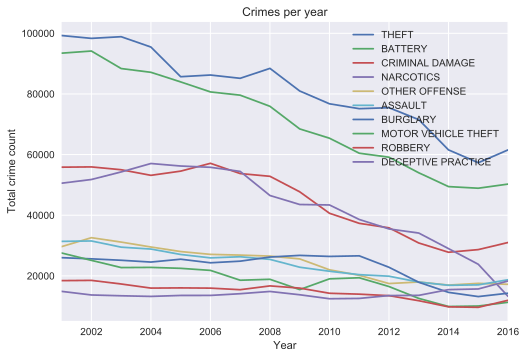

In [13]:
# Now let's plot all of them on the graph. Just do top 10 otherwise it's too messy
plt.figure(figsize=(8, 6))
by_year.loc[:, crimes['Primary Type'].value_counts().index.tolist()[0:10]].plot()
plt.xlabel('Year')
plt.ylabel('Total crime count')
plt.title('Crimes per year')
plt.legend()
plt.show()

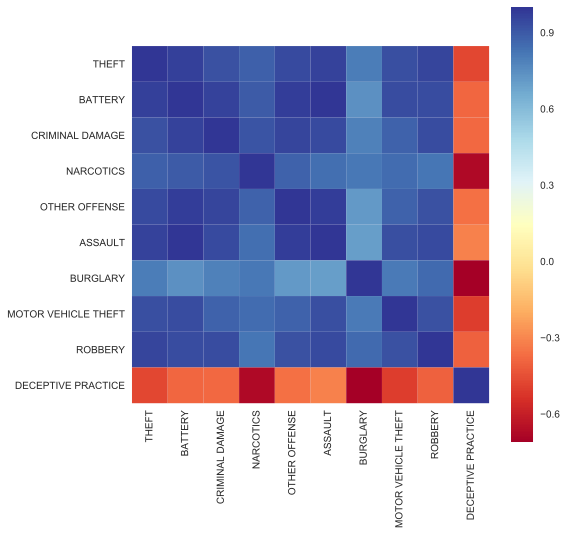

In [19]:
# Let's see if certain crimes are correlated
plt.figure(figsize=(8,8))
sns.heatmap(by_year.loc[:, crimes['Primary Type'].value_counts().index.tolist()[0:10]].corr(), cmap='RdYlBu', square=True)
plt.show()

<strong>From the above graph, 9 out 10 crimes show positive correlation with each other except for Deceptive Practice, which shows negative <br>
correlation with all other 9 crimes</strong>

<strong>Let's look at Robbery and Assault. By common sense, these two might go hand in hand.</strong>

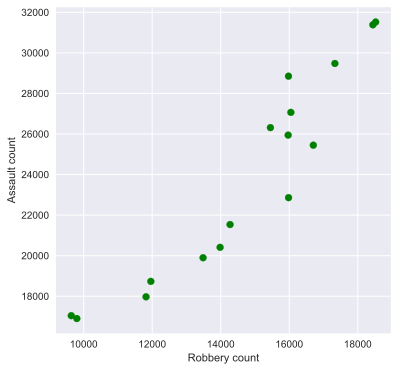

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(by_year['ROBBERY'], by_year['ASSAULT'], color='green')
plt.xlabel('Robbery count')
plt.ylabel('Assault count')
plt.show()

In [14]:
# Print Pearson Correlation Coefficient
coef=np.corrcoef(by_year['ROBBERY'].values, by_year['ASSAULT'].values)[0,1]
print('Pearson Correlation Coefficient between Robbery and Assault is: ', coef)

Pearson Correlation Coefficient between Robbery and Assault is:  0.939884497893


<strong>Since we have community information in this data set, we can combine that information with other statistics based on the communities<br>
to see if number of crimes correlate with other attributes of these communities.</strong>

The following data sets are extracted from <a href='http://www.robparal.com/ChicagoCommunityAreaData.html'>This website</a><br><br>
Education, Income and Poverty between 2011 and 2015 average. They have been manipulated to be in a usable form.

In [15]:
education=pd.read_csv('data/crime/education_2011_2015.csv')
income=pd.read_csv('data/crime/income_2011_2015.csv')
poverty=pd.read_csv('data/crime/poverty_2011_2015.csv')

In [16]:
education.head()

,Unnamed: 0,Community Name,Community Area,"('2011-2015', 'BA or Higher')","('2011-2015', 'High School Graduate Only')","('2011-2015', 'Not HS Graduate')","('2011-2015', 'Percent HS Grad or Higher')","('2011-2015', 'Percent with a BA or Higher')","('2011-2015', 'Some College')","('2011-2015', 'Total')"
0,0,Rogers Park,1,"15,502","6,998","5,862",84.0%,42.0%,"8,667","37,029"
1,1,West Ridge,2,"19,004","10,665","8,318",83.0%,39.0%,"10,346","48,333"
2,2,Uptown,3,"24,740","6,844","4,784",89.0%,55.0%,"8,502","44,870"
3,3,Lincoln Square,4,"18,676","3,778","3,290",90.0%,58.0%,"6,312","32,056"
4,4,North Center,5,"17,419","2,677","1,706",93.0%,68.0%,"3,763","25,565"


In [17]:
# Let's only keep BA or higher for simplicity
education.drop(education.columns.tolist()[0], axis=1, inplace=True)

In [18]:
education.drop(education.columns.tolist()[3:], axis=1, inplace=True)

In [19]:
education.columns=['Community Name', 'Community Area', 'BA or higher']

In [20]:
education['BA or higher']=education['BA or higher'].str.replace(',', '')
education['BA or higher']=education['BA or higher'].astype(int)
education.head()

,Community Name,Community Area,BA or higher
0,Rogers Park,1,15502
1,West Ridge,2,19004
2,Uptown,3,24740
3,Lincoln Square,4,18676
4,North Center,5,17419


In [21]:
education.to_csv('data/crime/education_infer.csv')

In [22]:
# Let's check the income table
income.head()

,Unnamed: 0,Community Name,Community Area,Median household income
0,60,Rogers Park,1,"$37,064"
1,74,West Ridge,2,"$46,008"
2,66,Uptown,3,"$45,661"
3,39,Lincoln Square,4,"$62,427"
4,51,North Center,5,"$91,197"


In [23]:
income.drop(income.columns.tolist()[0], axis=1, inplace=True)

In [24]:
income['Median household income']=income['Median household income'].str.replace('$', '')
income['Median household income']=income['Median household income'].str.replace(',', '')
income['Median household income']=income['Median household income'].astype(int)
income.head()

,Community Name,Community Area,Median household income
0,Rogers Park,1,37064
1,West Ridge,2,46008
2,Uptown,3,45661
3,Lincoln Square,4,62427
4,North Center,5,91197


In [25]:
income.to_csv('data/crime/income_infer.csv')

In [26]:
# Let's check poverty table
poverty.head()

,Unnamed: 0,Community Name,Community Area,"('2011-2015', 'Income below poverty level')","('2011-2015', 'Percent income below poverty level')","('2011-2015', 'Total')"
0,60,Rogers Park,1,"13,487",26.0%,"51,270"
1,74,West Ridge,2,"15,690",22.0%,"71,100"
2,66,Uptown,3,"12,928",24.0%,"53,760"
3,39,Lincoln Square,4,"4,797",12.0%,"40,177"
4,51,North Center,5,"1,918",6.0%,"34,568"


In [27]:
poverty.drop(poverty.columns.tolist()[0], axis=1, inplace=True)

In [28]:
poverty.drop(poverty.columns.tolist()[3:], axis=1, inplace=True)
poverty.columns=['Community Name', 'Community Area', 'Below poverty level']
poverty.head()

,Community Name,Community Area,Below poverty level
0,Rogers Park,1,"13,487"
1,West Ridge,2,"15,690"
2,Uptown,3,"12,928"
3,Lincoln Square,4,"4,797"
4,North Center,5,"1,918"


In [29]:
poverty['Below poverty level']=poverty['Below poverty level'].str.replace(',', '')
poverty['Below poverty level']=poverty['Below poverty level'].astype(int)
poverty.head()

,Community Name,Community Area,Below poverty level
0,Rogers Park,1,13487
1,West Ridge,2,15690
2,Uptown,3,12928
3,Lincoln Square,4,4797
4,North Center,5,1918


In [30]:
poverty.to_csv('data/crime/poverty_infer.csv')

For our crime data, we will group by community and then average each type of crimes between 2011 and 2015 to match our social data

In [31]:
crimes_2011_2015=crimes.loc['2011':'2015', :]

In [32]:
len(crimes_2011_2015)

1532622

In [33]:
crimes_2011_2015.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1532622 entries, 2011-01-01 01:00:00 to 2015-12-31 12:58:00
Data columns (total 22 columns):
ID                      1532622 non-null int64
Case Number             1532621 non-null object
Date                    1532622 non-null datetime64[ns]
Block                   1532622 non-null object
IUCR                    1532622 non-null object
Primary Type            1532622 non-null object
Description             1532622 non-null object
Location Description    1531417 non-null object
Arrest                  1532622 non-null bool
Domestic                1532622 non-null bool
Beat                    1532622 non-null int64
District                1532620 non-null float64
Ward                    1532594 non-null float64
Community Area          1532411 non-null float64
FBI Code                1532622 non-null object
X Coordinate            1519143 non-null float64
Y Coordinate            1519143 non-null float64
Year                    1532622

In [34]:
crimes_2011_2015.dropna(inplace=True)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
crimes_2011_2015['Community Area']=crimes_2011_2015['Community Area'].astype(int)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
crimes_2011_2015['Primary Type'].value_counts()

THEFT                                338445
BATTERY                              270669
CRIMINAL DAMAGE                      159922
NARCOTICS                            159054
BURGLARY                              94647
ASSAULT                               91817
OTHER OFFENSE                         89589
MOTOR VEHICLE THEFT                   68215
DECEPTIVE PRACTICE                    66194
ROBBERY                               58453
CRIMINAL TRESPASS                     38871
WEAPONS VIOLATION                     17461
PUBLIC PEACE VIOLATION                14530
OFFENSE INVOLVING CHILDREN            10881
PROSTITUTION                           9211
CRIM SEXUAL ASSAULT                    6459
INTERFERENCE WITH PUBLIC OFFICER       6258
SEX OFFENSE                            4765
GAMBLING                               2759
LIQUOR LAW VIOLATION                   2337
HOMICIDE                               2249
ARSON                                  2175
KIDNAPPING                      

In [37]:
by_community=crimes_2011_2015.groupby('Community Area')['Primary Type'].value_counts()

In [38]:
by_community.head(20)

Community Area  Primary Type                    
0               BATTERY                                3
                ASSAULT                                1
                CRIMINAL DAMAGE                        1
                OTHER OFFENSE                          1
1               THEFT                               4832
                BATTERY                             4292
                CRIMINAL DAMAGE                     2419
                NARCOTICS                           1805
                OTHER OFFENSE                       1549
                ASSAULT                             1417
                BURGLARY                             996
                DECEPTIVE PRACTICE                   923
                ROBBERY                              808
                CRIMINAL TRESPASS                    798
                MOTOR VEHICLE THEFT                  636
                WEAPONS VIOLATION                    241
                PUBLIC PEACE VIOLATION 

In [39]:
by_community=by_community.unstack(level=1, fill_value=0)

In [40]:
by_community.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Community Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,22,1417,4292,996,0,111,2419,798,923,17,27,0,116,11,11,59,636,1805,0,1,0,3,124,0,1549,85,0,191,808,106,14,4832,241
2,20,1050,3130,1543,1,71,2524,393,877,8,13,0,69,8,12,30,831,1054,0,0,1,5,154,0,1282,21,1,139,633,72,10,4469,137
3,16,1246,3330,801,1,127,1851,745,1351,6,28,0,56,9,7,18,920,2704,0,0,0,3,129,1,1263,22,2,178,622,100,10,5560,142
4,4,519,1629,763,0,41,1356,240,578,6,4,0,28,4,14,31,509,505,0,1,0,0,66,1,679,8,3,66,213,69,4,3054,46


In [41]:
by_community.drop(0, inplace=True)

In [42]:
by_community.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Community Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22,1417,4292,996,0,111,2419,798,923,17,27,0,116,11,11,59,636,1805,0,1,0,3,124,0,1549,85,0,191,808,106,14,4832,241
2,20,1050,3130,1543,1,71,2524,393,877,8,13,0,69,8,12,30,831,1054,0,0,1,5,154,0,1282,21,1,139,633,72,10,4469,137
3,16,1246,3330,801,1,127,1851,745,1351,6,28,0,56,9,7,18,920,2704,0,0,0,3,129,1,1263,22,2,178,622,100,10,5560,142
4,4,519,1629,763,0,41,1356,240,578,6,4,0,28,4,14,31,509,505,0,1,0,0,66,1,679,8,3,66,213,69,4,3054,46
5,14,300,811,926,0,35,1109,215,517,0,1,0,12,11,5,19,457,239,0,0,0,0,53,0,382,4,0,42,184,34,9,3033,17


Now let's calculate the 5 year average

In [53]:
by_community_avg=by_community.divide(5).round()

In [54]:
by_community_avg.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Community Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,283.0,858.0,199.0,0.0,22.0,484.0,160.0,185.0,3.0,5.0,0.0,23.0,2.0,2.0,12.0,127.0,361.0,0.0,0.0,0.0,1.0,25.0,0.0,310.0,17.0,0.0,38.0,162.0,21.0,3.0,966.0,48.0
2,4.0,210.0,626.0,309.0,0.0,14.0,505.0,79.0,175.0,2.0,3.0,0.0,14.0,2.0,2.0,6.0,166.0,211.0,0.0,0.0,0.0,1.0,31.0,0.0,256.0,4.0,0.0,28.0,127.0,14.0,2.0,894.0,27.0
3,3.0,249.0,666.0,160.0,0.0,25.0,370.0,149.0,270.0,1.0,6.0,0.0,11.0,2.0,1.0,4.0,184.0,541.0,0.0,0.0,0.0,1.0,26.0,0.0,253.0,4.0,0.0,36.0,124.0,20.0,2.0,1112.0,28.0
4,1.0,104.0,326.0,153.0,0.0,8.0,271.0,48.0,116.0,1.0,1.0,0.0,6.0,1.0,3.0,6.0,102.0,101.0,0.0,0.0,0.0,0.0,13.0,0.0,136.0,2.0,1.0,13.0,43.0,14.0,1.0,611.0,9.0
5,3.0,60.0,162.0,185.0,0.0,7.0,222.0,43.0,103.0,0.0,0.0,0.0,2.0,2.0,1.0,4.0,91.0,48.0,0.0,0.0,0.0,0.0,11.0,0.0,76.0,1.0,0.0,8.0,37.0,7.0,2.0,607.0,3.0


In [55]:
by_community_avg_all=pd.DataFrame(by_community_avg.sum(1), columns=['All Crimes'])

In [56]:
by_community_avg_all.head()

,All Crimes
Community Area,
1,4321.0
2,3712.0
3,4248.0
4,2091.0
5,1685.0


In [58]:
merged_df=by_community_avg_all.merge(education, left_index=True, right_on='Community Area')

In [59]:
merged_df.head()

,All Crimes,Community Name,Community Area,BA or higher
0,4321.0,Rogers Park,1,15502
1,3712.0,West Ridge,2,19004
2,4248.0,Uptown,3,24740
3,2091.0,Lincoln Square,4,18676
4,1685.0,North Center,5,17419


In [60]:
merged_df2=merged_df.merge(income, on='Community Area')

In [61]:
merged_df2.head()

,All Crimes,Community Name_x,Community Area,BA or higher,Community Name_y,Median household income
0,4321.0,Rogers Park,1,15502,Rogers Park,37064
1,3712.0,West Ridge,2,19004,West Ridge,46008
2,4248.0,Uptown,3,24740,Uptown,45661
3,2091.0,Lincoln Square,4,18676,Lincoln Square,62427
4,1685.0,North Center,5,17419,North Center,91197


In [62]:
merged_df3=merged_df2.merge(poverty, on='Community Area')

In [63]:
merged_df3.head()

,All Crimes,Community Name_x,Community Area,BA or higher,Community Name_y,Median household income,Community Name,Below poverty level
0,4321.0,Rogers Park,1,15502,Rogers Park,37064,Rogers Park,13487
1,3712.0,West Ridge,2,19004,West Ridge,46008,West Ridge,15690
2,4248.0,Uptown,3,24740,Uptown,45661,Uptown,12928
3,2091.0,Lincoln Square,4,18676,Lincoln Square,62427,Lincoln Square,4797
4,1685.0,North Center,5,17419,North Center,91197,North Center,1918


In [64]:
merged_df3.drop(['Community Name_x', 'Community Name_y'], axis=1, inplace=True)

In [65]:
merged_df3.head()

,All Crimes,Community Area,BA or higher,Median household income,Community Name,Below poverty level
0,4321.0,1,15502,37064,Rogers Park,13487
1,3712.0,2,19004,46008,West Ridge,15690
2,4248.0,3,24740,45661,Uptown,12928
3,2091.0,4,18676,62427,Lincoln Square,4797
4,1685.0,5,17419,91197,North Center,1918


In [66]:
merged_df3.index=merged_df3['Community Area']
merged_df3.drop('Community Name', axis=1, inplace=True)

In [68]:
merged_df3.drop('Community Area', axis=1, inplace=True)

In [69]:
merged_df3.head()

,All Crimes,BA or higher,Median household income,Below poverty level
Community Area,,,,
1,4321.0,15502,37064,13487
2,3712.0,19004,46008,15690
3,4248.0,24740,45661,12928
4,2091.0,18676,62427,4797
5,1685.0,17419,91197,1918


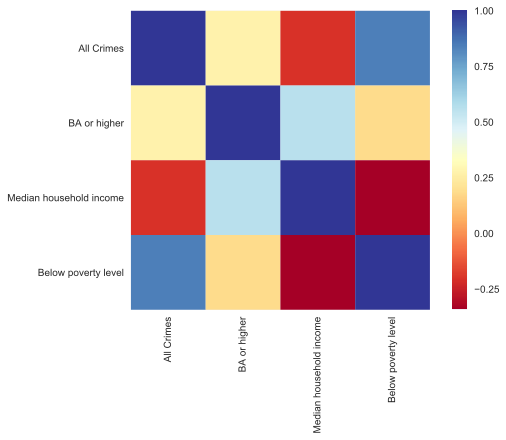

In [70]:
sns.heatmap(merged_df3.corr(), square=True, cmap='RdYlBu')
plt.show()

<strong>We can see strong positive correlation between all crimes and number of people below poverty level and a negative correlation between<br>
crimes and median income levels. And they make sense. But there seems to be a weak positive correlation between crimes and people with <br>
a BA degree or higher? Is it really so? We can test this week correlation to see how significant it is by simulation</strong>

In [71]:
# First get the correlation coefficient between crimes and people with BA or higher
actual_coef=np.corrcoef(merged_df3['All Crimes'].values, merged_df3['BA or higher'].values)[0,1]
print('Actual Pearson correlation coefficient between number of crimes and population with a BA degree or higher is: ', actual_coef)

Actual Pearson correlation coefficient between number of crimes and population with a BA degree or higher is:  0.272489368603


In [74]:
# We will permutate the crimes data and compute each permutation's correlation coefficient with the BA array and calculate the percentage of those
# coefficients that are larger than the actual number
test_coef=np.empty(10000)
for i in range(10000):
    perm_crime=np.random.permutation(merged_df3['All Crimes'].values)
    coef=np.corrcoef(perm_crime, merged_df3['BA or higher'].values)[0,1]
    test_coef[i]=coef
p_val=np.sum(test_coef>actual_coef)/len(test_coef)
print('The  p value is ', p_val)

The  p value is  0.0195


<strong>This p value is less than 0.05 and it appears to be significant. This seems to be a counter intuitive result since we think that education level <br>
should anti-correlate with number of crimes. Maybe if we break down all the crimes into specific type of crimes and we will find some clues<br>
as to what types of crimes actually postively correlate with higher education levels. And that's future work to be done. </strong>